In [19]:
class Event:
    def __init__(self, name, rate, compartments):
        self.name = name
        self.rate = rate
        self.compartments = compartments

    def calculate(self, **kwargs):
        return eval(self.rate, {}, kwargs)

    def update_compartment(self, compartment):
        try:        
            return self.compartments[compartment]
        except KeyError:
            return 0

    def __repr__(self):
        return self.name

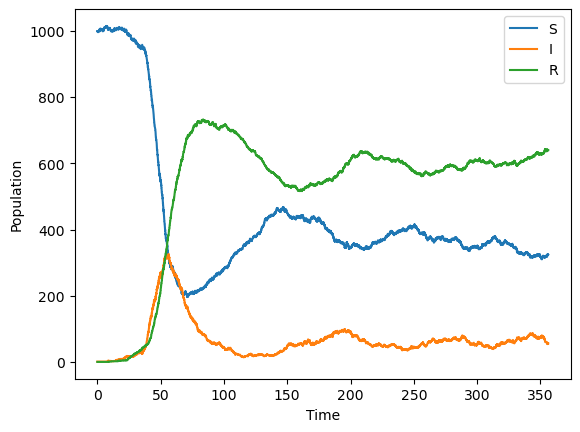

In [30]:
import numpy as np
import random
import matplotlib.pyplot as plt

# SIR model parameters
S, I, R = 999, 1, 0 #Initial populations
N = 1000  
t_end = 356 #Setting timeframe to 1 year
beta, gamma = 0.3, 0.1 #R0 set to 3
mu = 0.01 #Initial birth/death rate

# Initialize time and storage arrays
t = [0]
S_store, I_store, R_store = [S], [I], [R]

while t[-1] < t_end:
    #Defines events and all rates for each event
    events = [
        Event(name="birth", rate="mu * N", compartments={"S": 1}),
        Event(name="infection", rate="beta * ((S * I) / N)", compartments={"S": -1, "I": 1}),
        Event(name="recovery", rate="gamma * I", compartments={"I": -1, "R": 1}),
        Event(name="death_S", rate="mu * S", compartments={"S": -1}),
        Event(name="death_I", rate="mu * I", compartments={"I": -1}),
        Event(name="death_R", rate="mu * R", compartments={"R": -1}),
    ]
    R_total = np.sum([event.calculate(N=N, S=S, I=I, R=R, beta=beta, gamma=gamma, mu=mu)
                          for event in events])

    # Determining time to next event
    dt = (-1 / R_total) * np.log(random.random())
    t.append(t[-1] + dt) #Adding time increment 

    #Determining which event occurs
    P = random.random() * R_total
    cumulative_sum = 0
    for index, event in enumerate(events):
        '''
        The loop adds individuals to each population when the event occurs 
        Birth: Add 1 to Susceptible population
        Infection: Subtract 1 from Susceptible population, add 1 to Infected population
        Recovery: Subtract 1 from Infected population, add 1 to Recovered population
        Death: Subtract 1 from each respective population
        '''
        cumulative_sum += event.calculate(N=N, S=S, I=I, R=R, beta=beta, gamma=gamma, mu=mu)
        if P < cumulative_sum:
            S += event.update_compartment("S")
            I += event.update_compartment("I")
            R += event.update_compartment("R")
            break

    
    S_store.append(S)
    I_store.append(I)
    R_store.append(R)

# Plotting the results
plt.plot(t, S_store, label='S')
plt.plot(t, I_store, label='I')
plt.plot(t, R_store, label='R')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()